# Obesity Data Analysis

This notebook provides a detailed analysis of the **Obesity dataset**. We will start with basic preprocessing, exploratory data analysis, and proceed to model training using **Decision Tree** and **Random Forest** classifiers.

---

## 1. Preliminary Dataset Understanding

First, let's load the dataset and get an overview of its structure, including its size, data types, and a brief look at the first few rows.

In [34]:
# Importing necessary libraries
import pandas as pd
# Load the dataset from the current directory
df = pd.read_csv('./obesity.csv')

#display the number of columns and rows
shape = df.shape
print('shape =',shape)
print("------------------------------------")

# Display the first few rows of the dataset to ensure it's loaded correctly
df.head()

shape = (2111, 17)
------------------------------------


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [35]:
# Get an overview of the dataset, including non-null counts and data types
print("overview of the dataset")
df.info()

overview of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF       

In [36]:
# Get a quick statistical summary of the numeric columns
print("statistical summary of the numeric columns")
df.describe()

statistical summary of the numeric columns


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [37]:
# Check for duplicate rows in the dataset
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 24


## 2. Summary of Column Information

Next, we summarize the dataset by displaying the number of missing values, unique values, and data types for each column.


In [38]:
# Create a DataFrame summarizing the column information along with unique values
summary = pd.DataFrame({
    'Data Type': df.dtypes,
    'Number of Null Values': df.isnull().sum(),
    'Percentage of Null Values': (df.isnull().sum() / len(df)) * 100,
    'Number of Unique Values': df.nunique()
})

# Display the summary
summary


,Data Type,Number of Null Values,Percentage of Null Values,Number of Unique Values
Gender,object,0,0.0,2
Age,float64,0,0.0,1402
Height,float64,0,0.0,1574
Weight,float64,0,0.0,1525
family_history_with_overweight,object,0,0.0,2
FAVC,object,0,0.0,2
FCVC,float64,0,0.0,810
NCP,float64,0,0.0,635
CAEC,object,0,0.0,4
SMOKE,object,0,0.0,2


In [39]:
# Identify categorical columns (typically columns with data type 'object')
categorical_columns = df.select_dtypes(include=['object']).columns

# List unique values for each categorical column
for col in categorical_columns:
    unique_vals = df[col].unique()
    print(f"Unique values for '{col}':")
    print(unique_vals)
    print("------------------------------------")


Unique values for 'Gender':
['Female' 'Male']
------------------------------------
Unique values for 'family_history_with_overweight':
['yes' 'no']
------------------------------------
Unique values for 'FAVC':
['no' 'yes']
------------------------------------
Unique values for 'CAEC':
['Sometimes' 'Frequently' 'Always' 'no']
------------------------------------
Unique values for 'SMOKE':
['no' 'yes']
------------------------------------
Unique values for 'SCC':
['no' 'yes']
------------------------------------
Unique values for 'CALC':
['no' 'Sometimes' 'Frequently' 'Always']
------------------------------------
Unique values for 'MTRANS':
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
------------------------------------
Unique values for 'NObeyesdad':
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']
------------------------------------


## 3. Preprocessing the Dataset

In this step, we will:
1. Convert all column names and categorical values to lowercase for consistency.
2. Remove any duplicate rows from the dataset.


In [40]:
# Preprocess the dataset
def preprocess_data(df):
    # Convert column names and categorical values to lowercase
    df.columns = df.columns.str.lower()
    df = df.applymap(lambda s: s.lower() if isinstance(s, str) else s)
    
    # Remove duplicates
    df.drop_duplicates(inplace=True)
    print(f"\nDuplicates removed. New shape: {df.shape}")
    
    return df

# Run the preprocessing function
df = preprocess_data(df)


Duplicates removed. New shape: (2087, 17)


/var/folders/v5/34qd9j3x111bmlmlwdpbythr0000gn/T/ipykernel_16567/1624723132.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda s: s.lower() if isinstance(s, str) else s)


## 4. Exploratory Data Analysis (EDA)

We will now visualize:
1. The distribution of numeric columns.
2. The distribution of categorical columns.


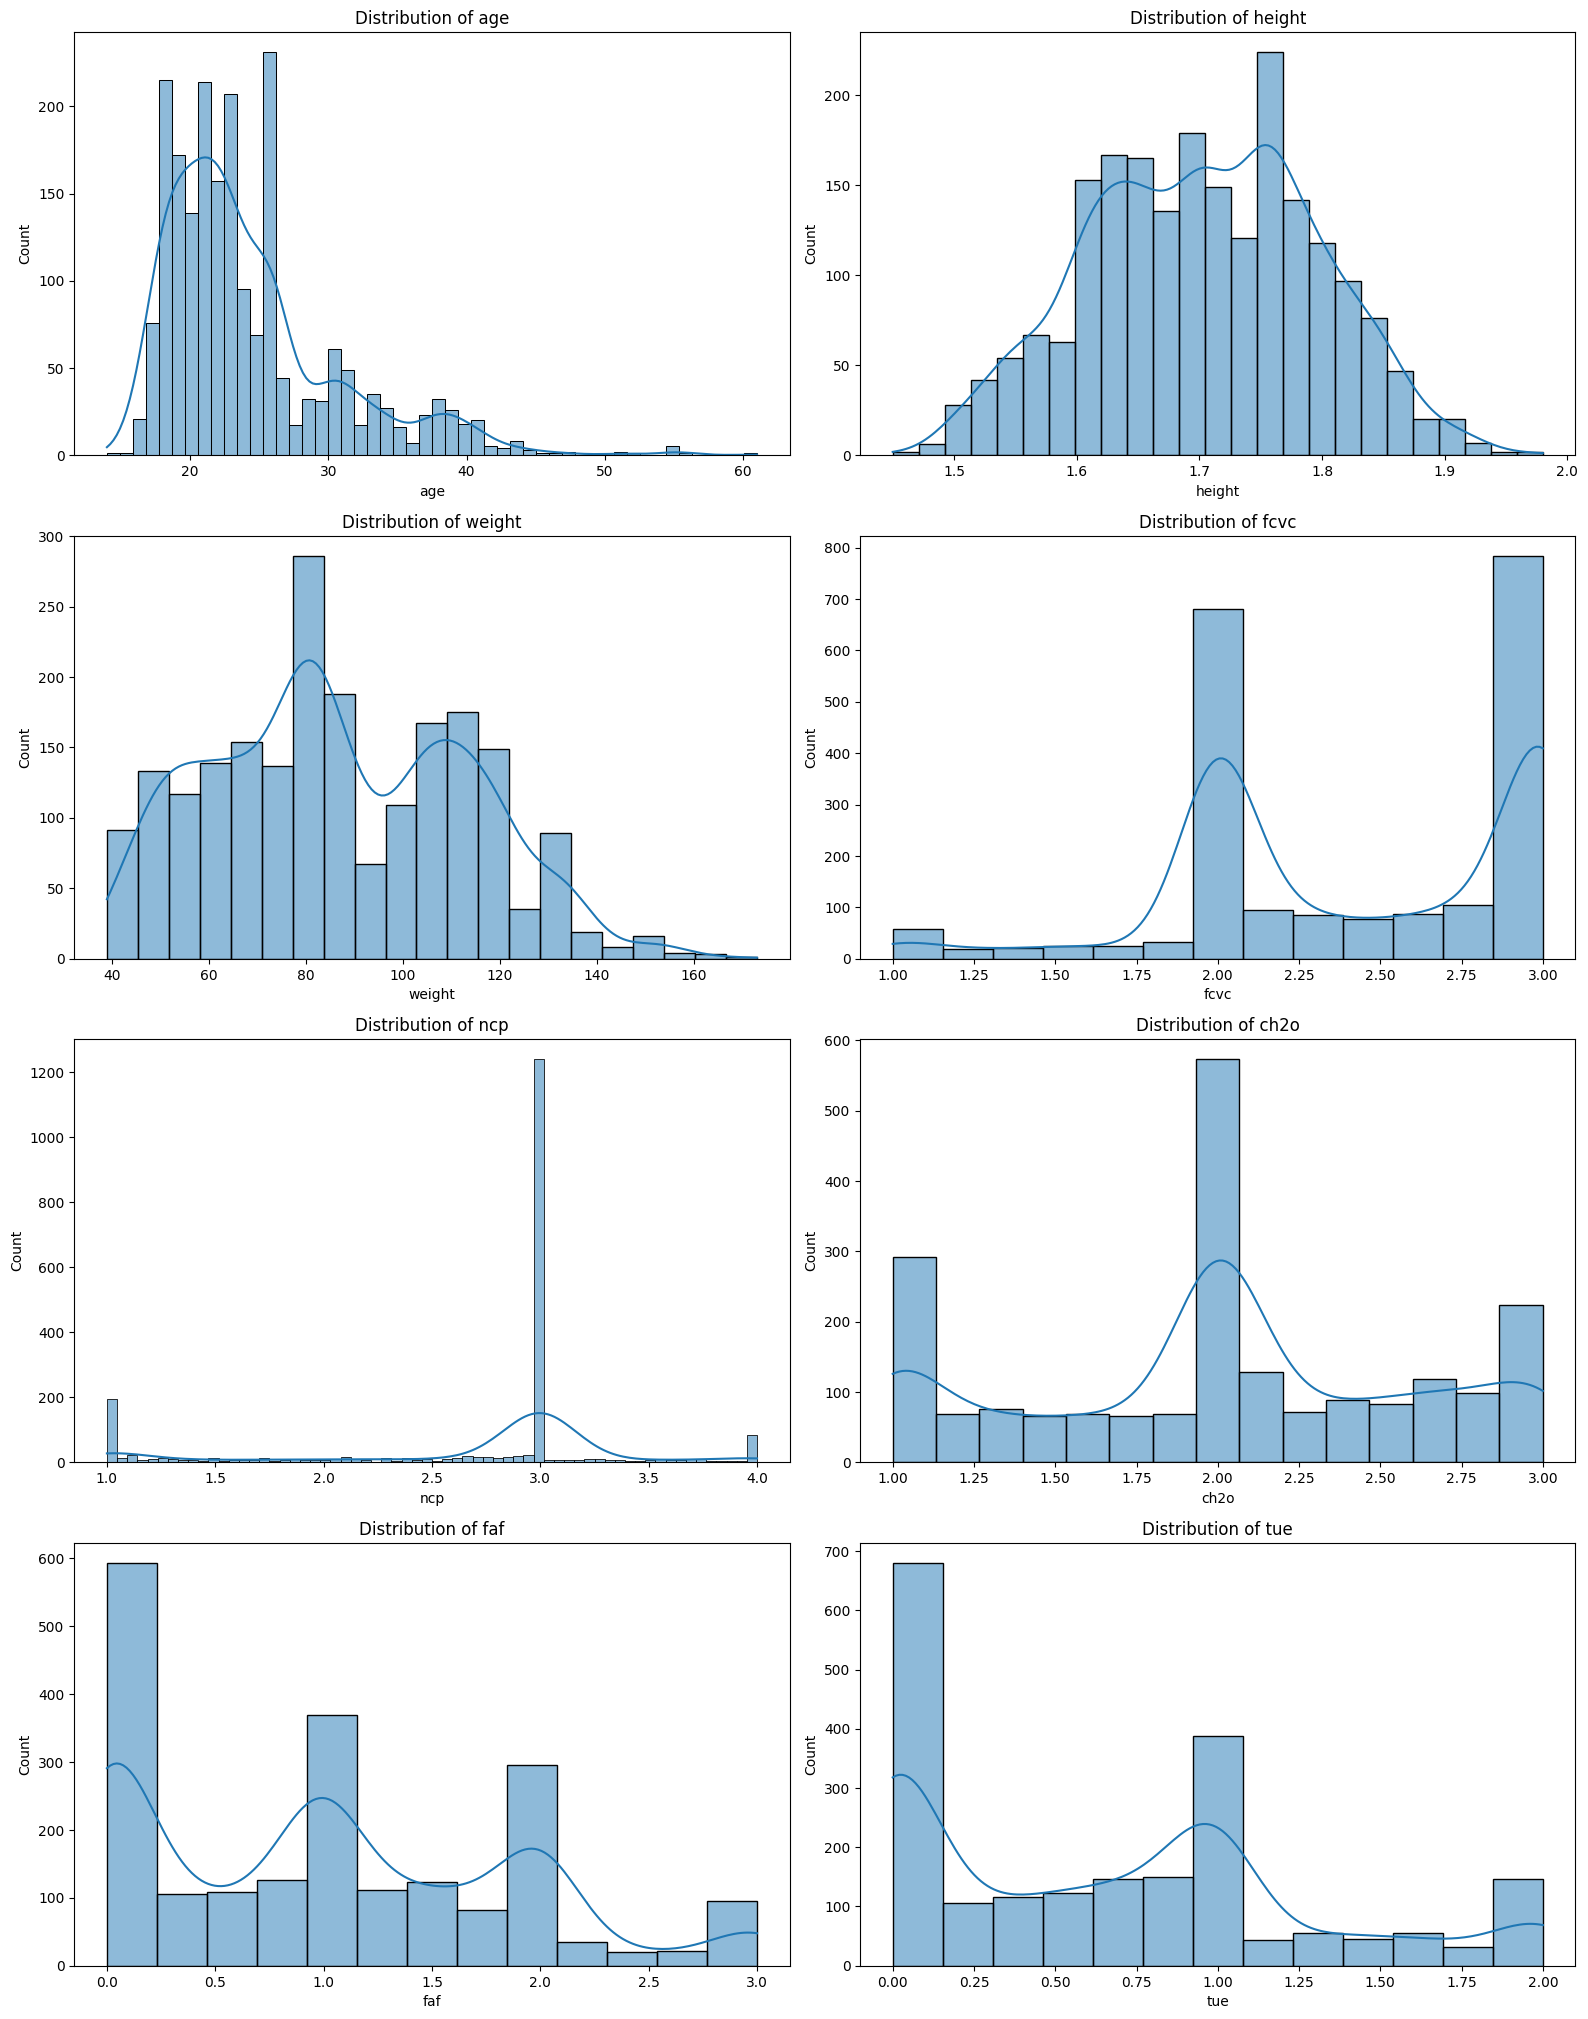

In [41]:
# Visualize the distribution of numeric columns
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    plt.figure(figsize=(16, len(numeric_columns) * 5))
    for i, col in enumerate(numeric_columns):
        plt.subplot(len(numeric_columns), 2, i + 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

# Visualize the distribution of numeric columns
plot_numeric_distribution(df)


### Categorical Features Distribution

Next, let's visualize the distribution of the categorical columns using bar plots.


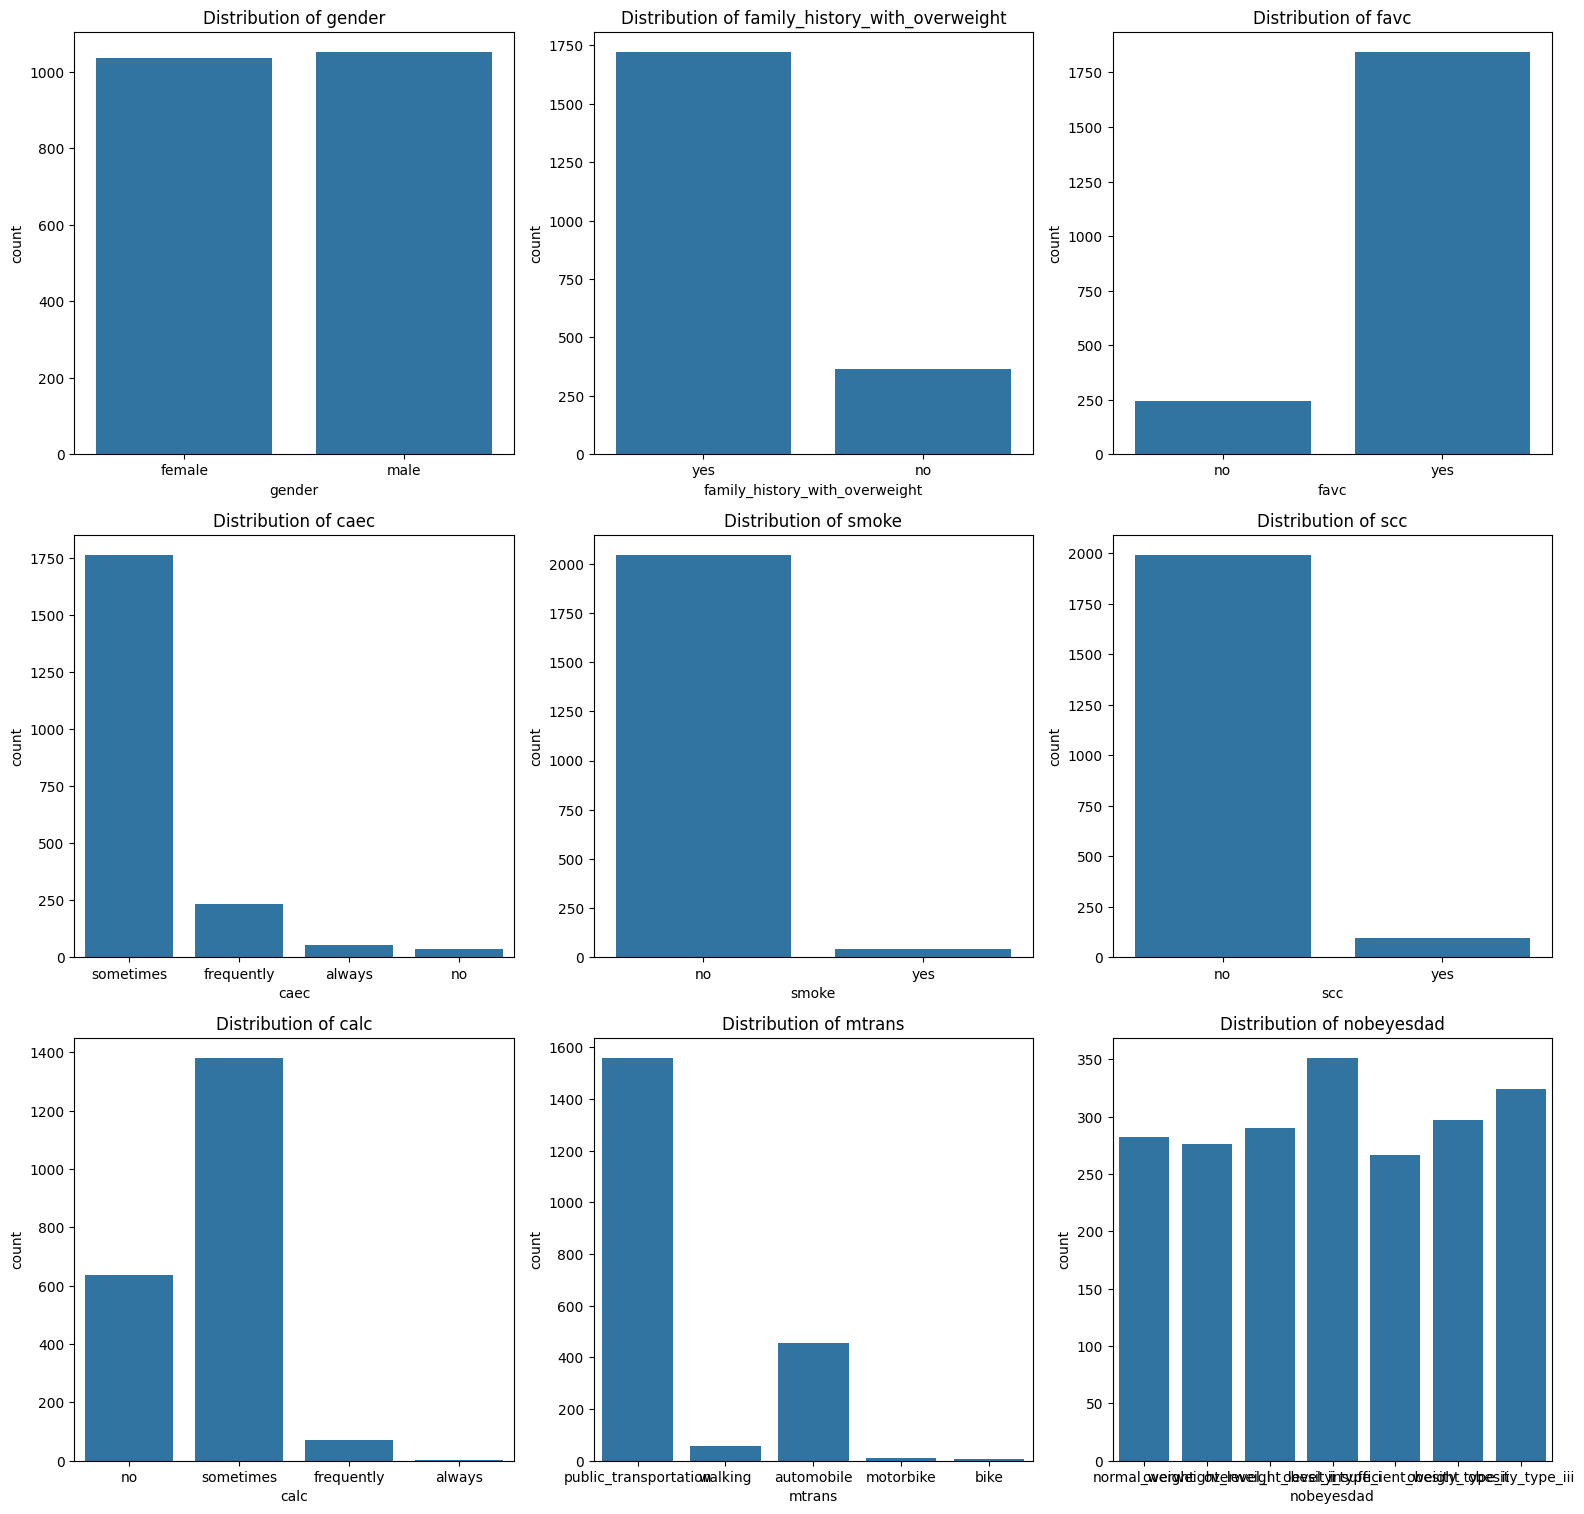

In [42]:
# Visualize the distribution of categorical columns
def plot_categorical_distribution(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    plt.figure(figsize=(16, len(categorical_columns) * 5))
    for i, col in enumerate(categorical_columns):
        plt.subplot(len(categorical_columns), 3, i + 1)
        sns.countplot(x=col, data=df)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

# Run the function to plot categorical distributions
plot_categorical_distribution(df)


## 5. Exploring Relationships: Age/Height/Weight vs Obesity Levels

We'll now visualize the relationships between age, weight, and height with obesity levels using **box plots**.


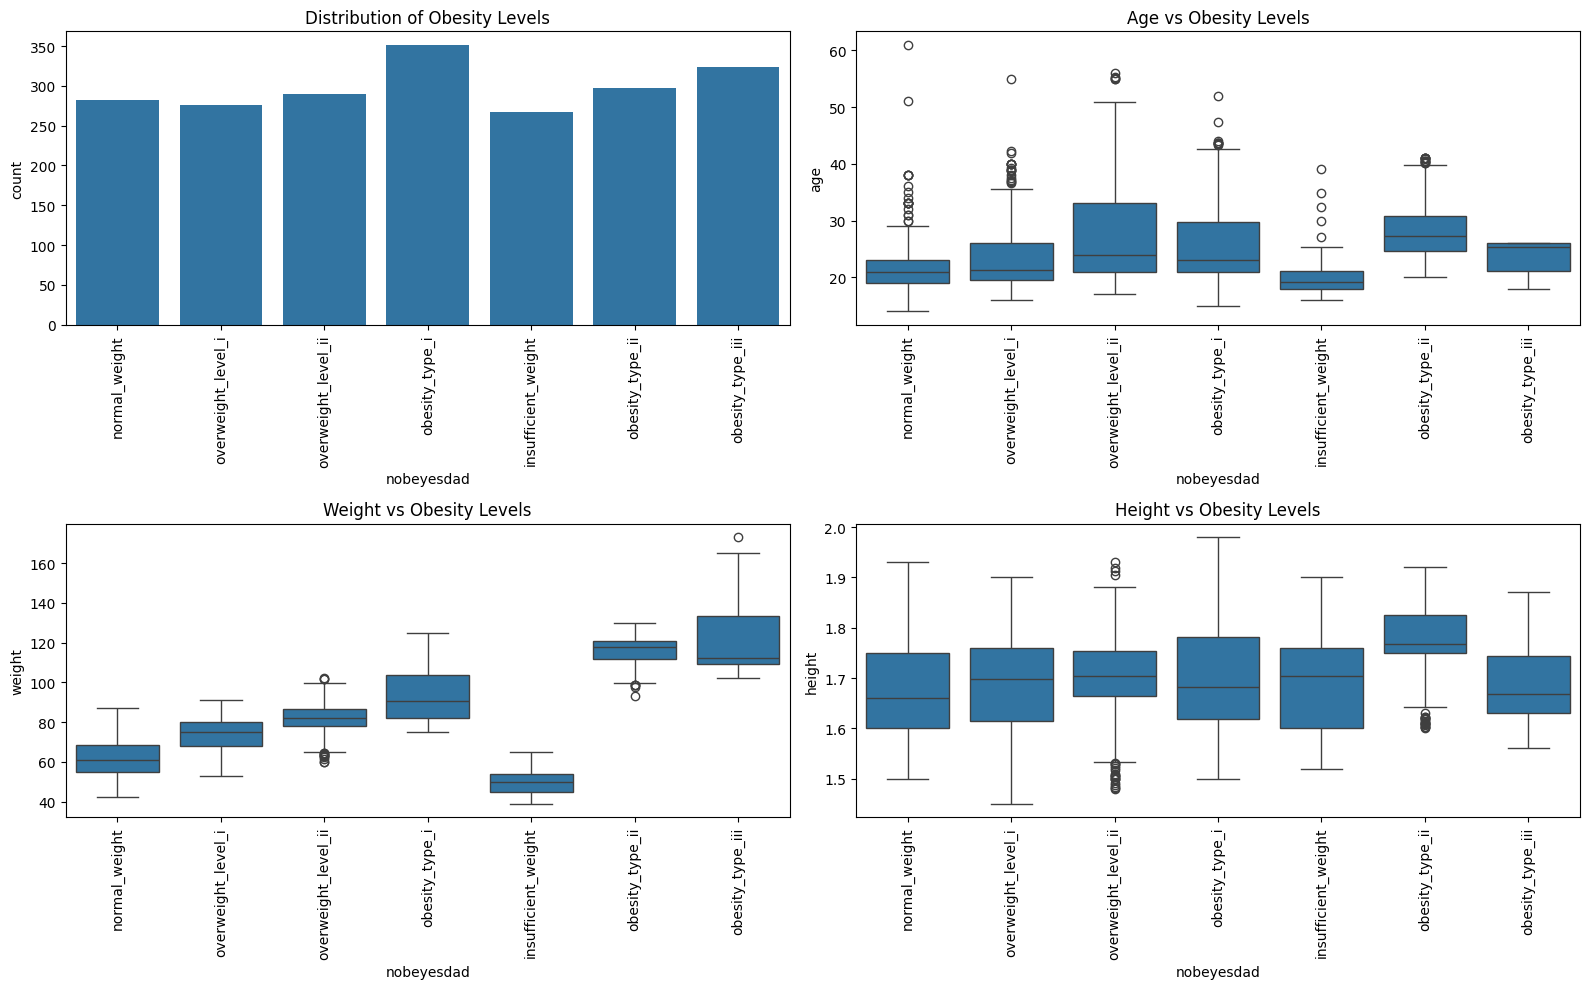

In [43]:
# Visualize relationships between Age/Weight/Height vs Obesity Levels
def plot_vs_obesity_levels(df):
    plt.figure(figsize=(16, 10))
    
    plt.subplot(2, 2, 1)
    sns.countplot(x='nobeyesdad', data=df)
    plt.title('Distribution of Obesity Levels')
    plt.xticks(rotation=90)
    
    plt.subplot(2, 2, 2)
    sns.boxplot(x='nobeyesdad', y='age', data=df)
    plt.title('Age vs Obesity Levels')
    plt.xticks(rotation=90)
    
    plt.subplot(2, 2, 3)
    sns.boxplot(x='nobeyesdad', y='weight', data=df)
    plt.title('Weight vs Obesity Levels')
    plt.xticks(rotation=90)
    
    plt.subplot(2, 2, 4)
    sns.boxplot(x='nobeyesdad', y='height', data=df)
    plt.title('Height vs Obesity Levels')
    plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.show()

# Run the function to visualize relationships with obesity levels
plot_vs_obesity_levels(df)


## 6. Correlation Matrix (Heatmap)

We will visualize the correlation between numeric features to understand how they relate to each other.


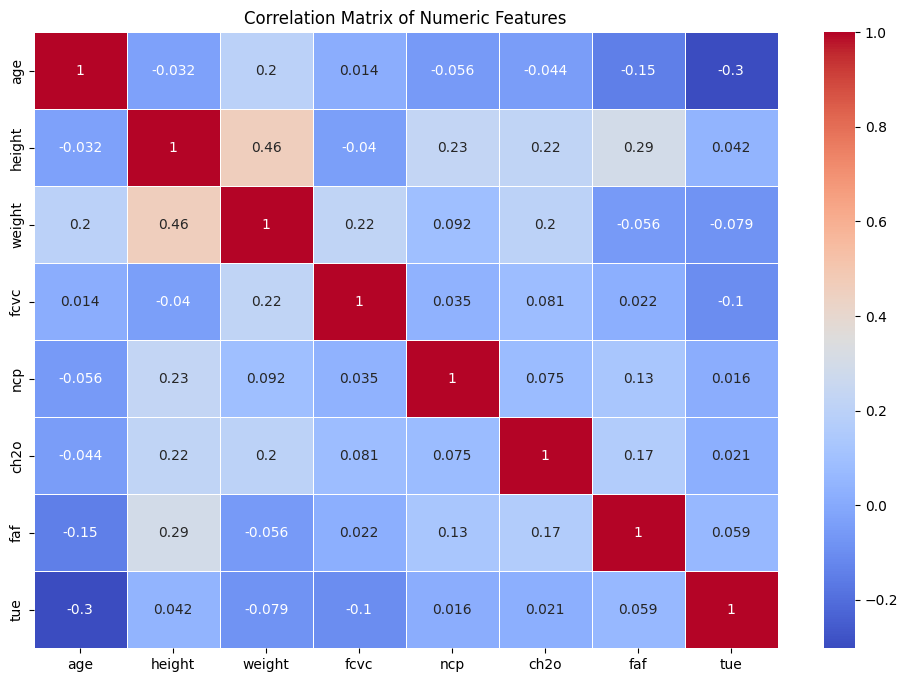

In [44]:
# Plot correlation matrix for numeric columns
def plot_correlation_matrix(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64'])
    plt.figure(figsize=(12, 8))
    corr_matrix = numeric_columns.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix of Numeric Features')
    plt.show()

# Run the function to visualize the correlation matrix
plot_correlation_matrix(df)


## 7. Handling Outliers: Capping with the IQR Method

We will now cap outliers using the Interquartile Range (IQR) method to ensure extreme values are controlled.


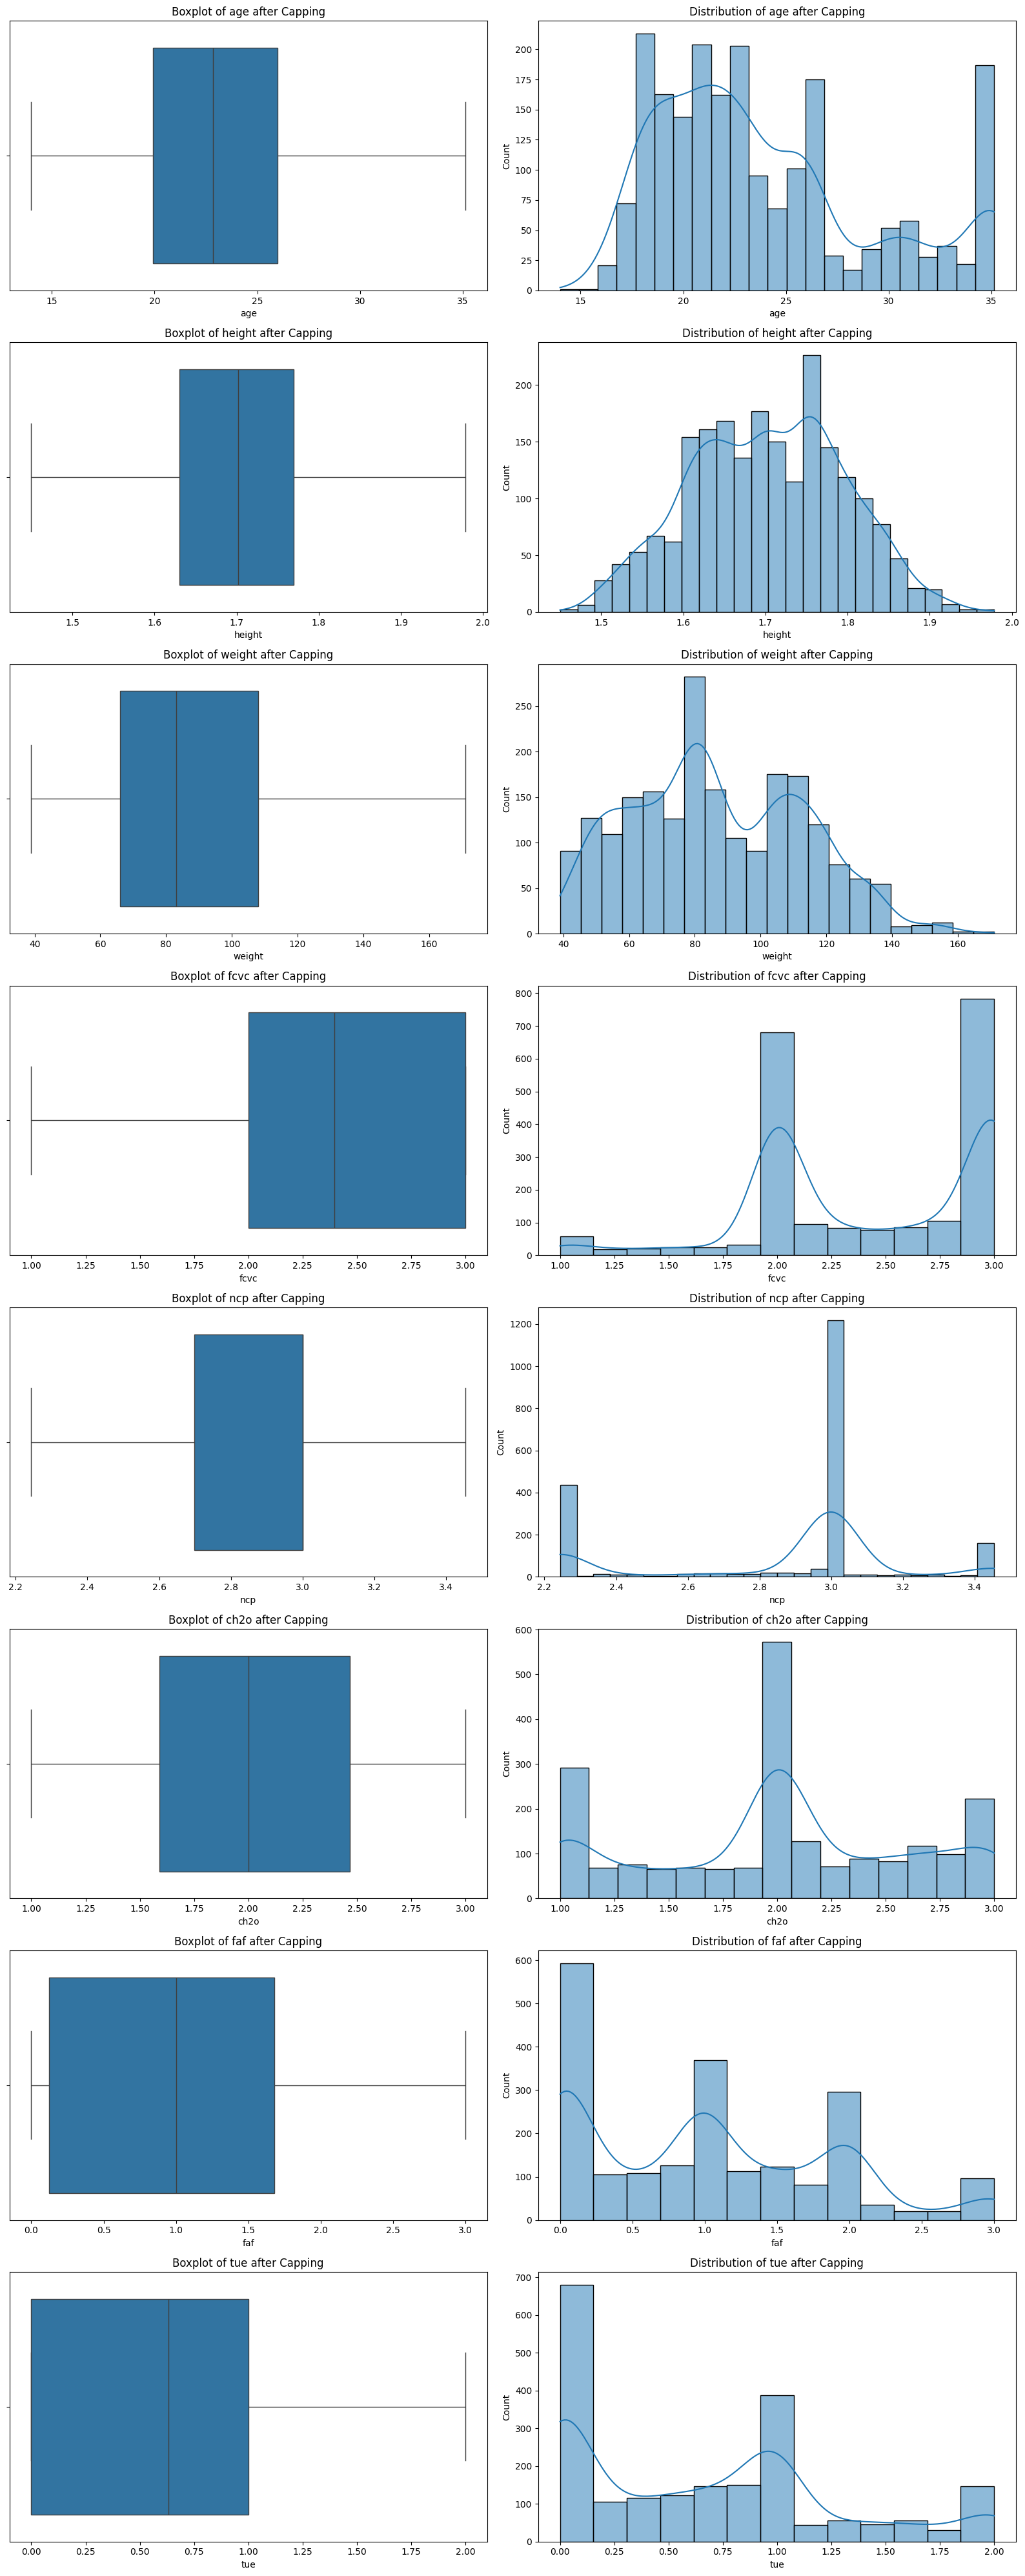

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to cap outliers based on IQR
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower_bound, upper_bound)
    return df

# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Cap outliers in numeric columns
obesity_data_capped = cap_outliers(df.copy(), numeric_columns)

# Replot the boxplots and distribution plots to visualize the effect of capping
plt.figure(figsize=(16, len(numeric_columns) * 5))  # Adjust figure height dynamically

for i, col in enumerate(numeric_columns):
    # Boxplot
    plt.subplot(len(numeric_columns), 2, 2 * i + 1)
    sns.boxplot(x=obesity_data_capped[col])
    plt.title(f'Boxplot of {col} after Capping')
    
    # Distribution plot (histogram + KDE)
    plt.subplot(len(numeric_columns), 2, 2 * i + 2)
    sns.histplot(obesity_data_capped[col], kde=True)
    plt.title(f'Distribution of {col} after Capping')

plt.tight_layout()
plt.show()


## 8. Save the preprocessed data to a CSV file

In [46]:
# Save the preprocessed data to a CSV file
df.to_csv('preprocessed_obesity.csv', index=False)
print("Data has been successfully saved as 'preprocessed_obesity.csv'.")

Data has been successfully saved as 'preprocessed_obesity.csv'.


## 9. Model Training
Now, we will train **Logistic Regression**, **Decision Tree**, and **Random Forest** models using different `max_depth` values and evaluate their accuracy. Let's first load the preprocessed data. 

In [47]:
# Load the preprocessed dataset
df_preprocessed = pd.read_csv('./preprocessed_obesity.csv')
df_preprocessed.head()
df_preprocessed.shape

(2087, 17)

### 9.1 **Logistic Regression**

In [48]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Automatically define categorical and numeric columns based on data types, excluding the target column
target_column = 'nobeyesdad'
categorical_columns = df_preprocessed.select_dtypes(include=['object']).columns.tolist()
numeric_columns = df_preprocessed.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove the target column from the categorical list (because it's also an object type)
categorical_columns.remove(target_column)

# Define features and target variable
X = df_preprocessed.drop(target_column, axis=1)
y = df_preprocessed[target_column]

# Create a column transformer for One-Hot Encoding of categorical columns and scaling of numeric columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),  # One-hot encoding for categorical columns
        ('num', StandardScaler(), numeric_columns)      # Standard scaling for numeric columns
    ])

# Create a pipeline with preprocessor and Logistic Regression with more iterations
log_reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', LogisticRegression(max_iter=2000))])  # Increased max_iter

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Logistic Regression model
log_reg_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg_pipeline.predict(X_test)

# Evaluate the model
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
log_reg_report = classification_report(y_test, y_pred_log_reg)

# Output accuracy and classification report
print(f"Logistic Regression model accuracy: {log_reg_acc * 100:.2f}%")
print("Classification Report:\n", log_reg_report)

Logistic Regression model accuracy: 85.01%
Classification Report:
                      precision    recall  f1-score   support

insufficient_weight       0.87      0.95      0.91        87
      normal_weight       0.87      0.65      0.75        95
     obesity_type_i       0.93      0.88      0.90       105
    obesity_type_ii       0.97      0.99      0.98        95
   obesity_type_iii       0.98      1.00      0.99        91
 overweight_level_i       0.65      0.65      0.65        80
overweight_level_ii       0.64      0.80      0.71        74

           accuracy                           0.85       627
          macro avg       0.85      0.85      0.84       627
       weighted avg       0.86      0.85      0.85       627



### 9.2 **Decision Tree**, and **Random Forest**


Decision Tree Performance:
Decision Tree model accuracy with max_depth=3: 65.87%
Decision Tree model accuracy with max_depth=4: 74.32%
Decision Tree model accuracy with max_depth=5: 85.49%
Decision Tree model accuracy with max_depth=6: 89.00%
Decision Tree model accuracy with max_depth=7: 93.14%
Decision Tree model accuracy with max_depth=8: 93.30%
Decision Tree model accuracy with max_depth=9: 94.10%
Decision Tree model accuracy with max_depth=10: 93.78%


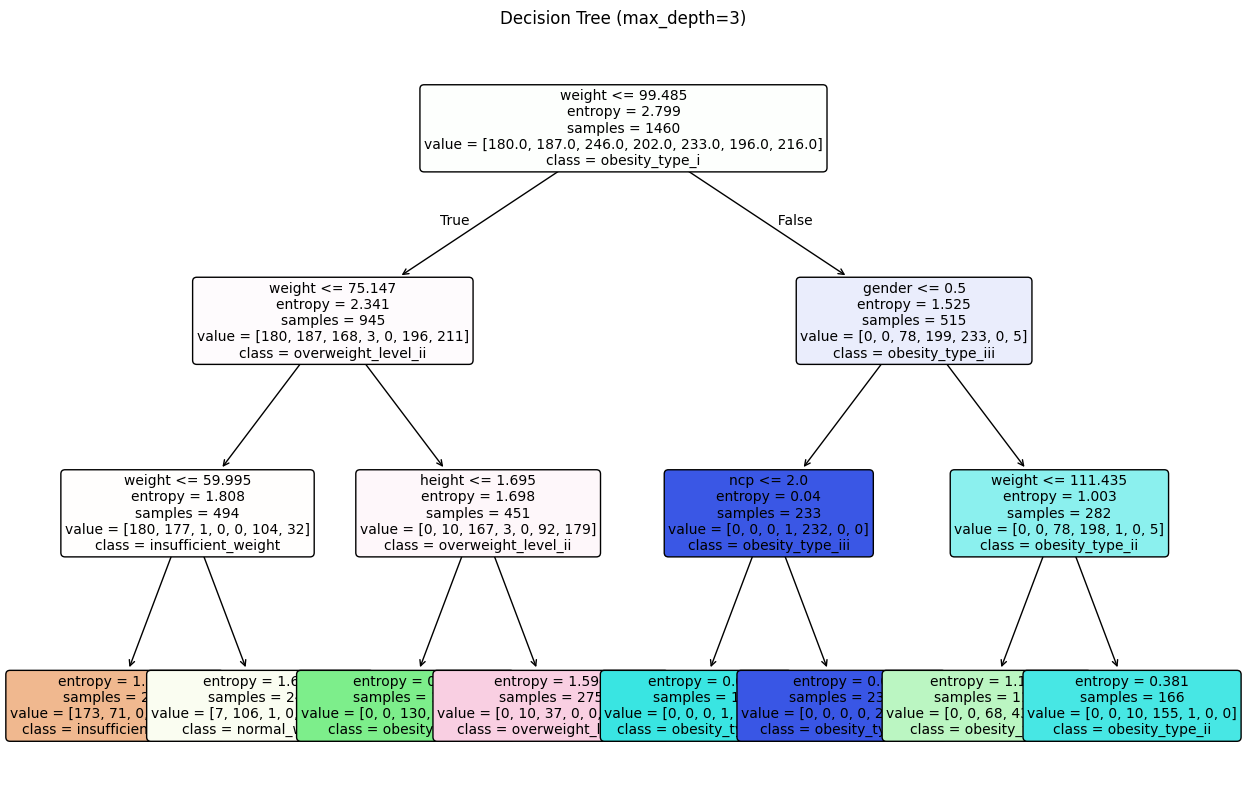


Random Forest Performance:
Random Forest model accuracy with max_depth=3: 70.81%
Random Forest model accuracy with max_depth=4: 82.93%
Random Forest model accuracy with max_depth=5: 88.04%
Random Forest model accuracy with max_depth=6: 91.87%
Random Forest model accuracy with max_depth=7: 92.50%
Random Forest model accuracy with max_depth=8: 93.94%
Random Forest model accuracy with max_depth=9: 94.42%
Random Forest model accuracy with max_depth=10: 95.22%


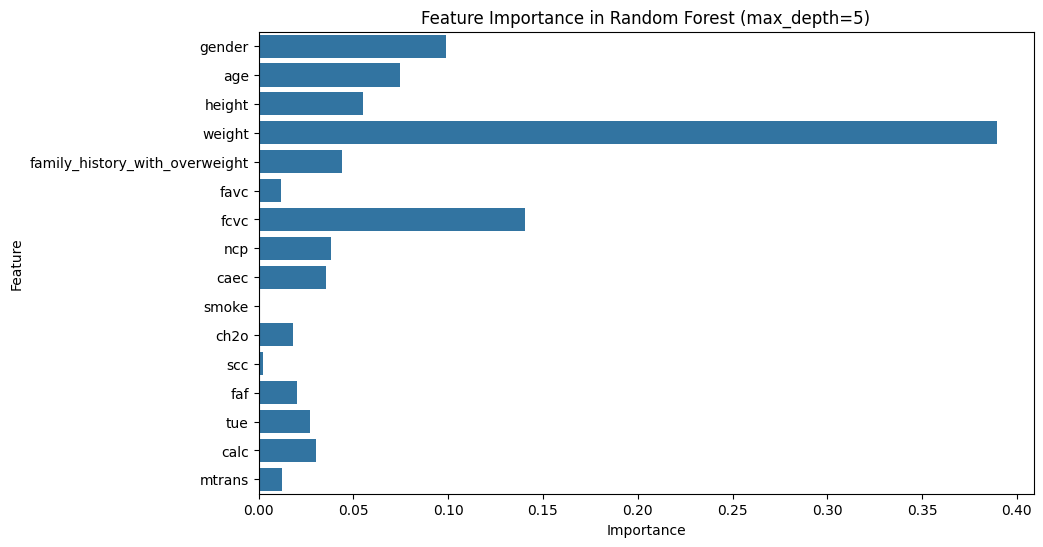

In [50]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

# Function for training and visualizing models
def train_and_visualize_models(df_preprocessed):
    # Encode categorical variables
    target_column = 'nobeyesdad'
    categorical_columns = df_preprocessed.select_dtypes(include=['object']).columns.tolist()
    categorical_columns.remove(target_column)
    
    label_encoder = LabelEncoder()
    for col in categorical_columns:
        df_preprocessed[col] = label_encoder.fit_transform(df_preprocessed[col])
    df_preprocessed[target_column] = label_encoder.fit_transform(df_preprocessed[target_column])

    # Train-test split
    X = df_preprocessed.drop(target_column, axis=1)
    y = df_preprocessed[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Decision Tree - Train with varying max_depth
    print("\nDecision Tree Performance:")
    for depth in range(3, 11):
        clf_dt = DecisionTreeClassifier(max_depth=depth, criterion='entropy', random_state=42)
        clf_dt.fit(X_train, y_train)
        accuracy_dt = clf_dt.score(X_test, y_test)
        print(f"Decision Tree model accuracy with max_depth={depth}: {accuracy_dt * 100:.2f}%")

    # Visualize Decision Tree (max_depth=3)
    clf_dt_3 = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=42)
    clf_dt_3.fit(X_train, y_train)
    plt.figure(figsize=(15, 10))
    tree.plot_tree(clf_dt_3, feature_names=X.columns, class_names=label_encoder.classes_, filled=True, fontsize=10, rounded=True)
    plt.title("Decision Tree (max_depth=3)")
    plt.show()

    # Random Forest - Train with varying max_depth
    print("\nRandom Forest Performance:")
    for depth in range(3, 11):
        clf_rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
        clf_rf.fit(X_train, y_train)
        accuracy_rf = clf_rf.score(X_test, y_test)
        print(f"Random Forest model accuracy with max_depth={depth}: {accuracy_rf * 100:.2f}%")

    # Feature importance for Random Forest (max_depth=5)
    clf_rf_5 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
    clf_rf_5.fit(X_train, y_train)
    feature_importances = clf_rf_5.feature_importances_
    
    # Plot Feature Importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances, y=X.columns)
    plt.title("Feature Importance in Random Forest (max_depth=5)")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()

# Run the model training and visualization function
train_and_visualize_models(df_preprocessed)
